# Homework 3 - Programming Section Notebook

## Context

Given a dataset of 5875 patients showcasing different medical metrics related to Parkinson's diagnostic.
We must create a predictor for this disease that scores the likelihood according to the Unified Parkinson's Disease Rating Scale

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = "parkinsons.csv"

data_df = pd.read_csv(dataset_file_path)

X = data_df.drop("target", axis=1)
y = data_df["target"]

## 5 - Mean Absolute Error across different regression models (Linear, MLP no activation, MLP with ReLU activation)

c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

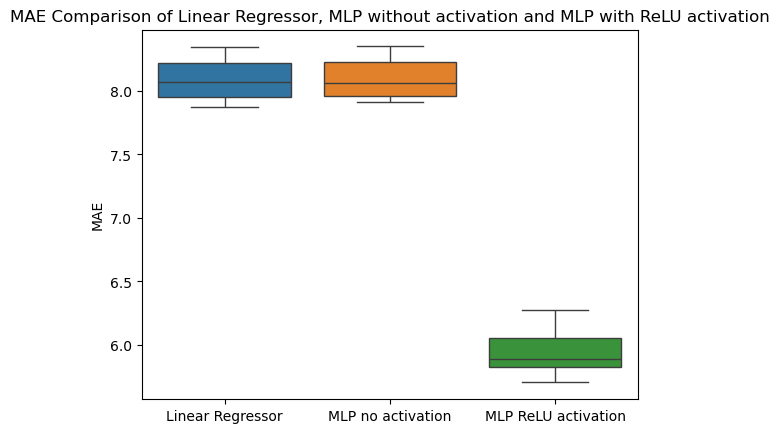

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

n_runs = 10

lr_MAE = []
mlp_no_activation_MAE = []
mlp_ReLU_MAE = []

hidden_layers = (10,10)

for run in range(1,n_runs+1):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=run)

    linear_regressor = LinearRegression()
    linear_regressor.fit(X_train,y_train)

    y_pred_test = linear_regressor.predict(X_test)
    lr_MAE.append(round(mean_absolute_error(y_test,y_pred_test), ndigits=4))

    mlp_no_activation_regressor = MLPRegressor(hidden_layer_sizes=hidden_layers,activation='identity', random_state=0)
    mlp_no_activation_regressor.fit(X_train,y_train)

    y_pred_test = mlp_no_activation_regressor.predict(X_test)
    mlp_no_activation_MAE.append(round(mean_absolute_error(y_test,y_pred_test), ndigits=4))

    mlp_ReLU_regressor = MLPRegressor(hidden_layer_sizes=hidden_layers,activation='relu',random_state=0)
    mlp_ReLU_regressor.fit(X_train,y_train)

    y_pred_test = mlp_ReLU_regressor.predict(X_test)
    mlp_ReLU_MAE.append(round(mean_absolute_error(y_test,y_pred_test), ndigits=4))

results_df = pd.DataFrame({
    "Linear Regressor": lr_MAE,
    "MLP no activation": mlp_no_activation_MAE,
    "MLP ReLU activation": mlp_ReLU_MAE
})

sns.boxplot(data=results_df)
plt.title('MAE Comparison of Linear Regressor, MLP without activation and MLP with ReLU activation')
plt.ylabel('MAE')
plt.show()

## 7 - Mean Absolute Error across different hyperparameters combinations for a MLP regressor

In [11]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

l2_penalty_values = [0.0001, 0.001, 0.01]
learning_rate_values = [0.001, 0.01, 0.1]
batch_size_values = [32,64,128]

mlp_regressor = MLPRegressor(hidden_layer_sizes=hidden_layers, random_state=0)
#print(mlp_regressor.get_params())

parameters = {'alpha': l2_penalty_values, 'learning_rate_init':learning_rate_values, 'batch_size':batch_size_values}

gridSearch_clf = GridSearchCV(mlp_regressor, parameters, refit=False, cv=ShuffleSplit(n_splits=1,test_size=0.2,random_state=0), scoring='neg_mean_absolute_error') 
gridSearch_clf.fit(X,y)

scores = gridSearch_clf.cv_results_
print(scores)

c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

{'mean_fit_time': array([6.70964241, 3.12740064, 1.8429575 , 3.05392718, 3.30473471,
       1.41867828, 1.82542968, 1.97801828, 0.87137246, 8.6954093 ,
       7.64680839, 1.28305078, 4.37558246, 2.47606206, 0.7759707 ,
       2.16268158, 2.39684558, 0.69147396, 6.76027775, 2.30610561,
       1.32986712, 3.73408914, 1.96957779, 0.72303843, 2.1604414 ,
       1.86992955, 0.81729007]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0.00399828, 0.00252604, 0.00412011, 0.00195456, 0.00199866,
       0.00253081, 0.00299907, 0.00200105, 0.00194192, 0.00251341,
       0.00383687, 0.00292277, 0.00296545, 0.00289226, 0.00304389,
       0.00265384, 0.00266671, 0.00713801, 0.00198436, 0.00424027,
       0.00264168, 0.00196576, 0.00277567, 0.00189853, 0.00194359,
       0.00599957, 0.00194955]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

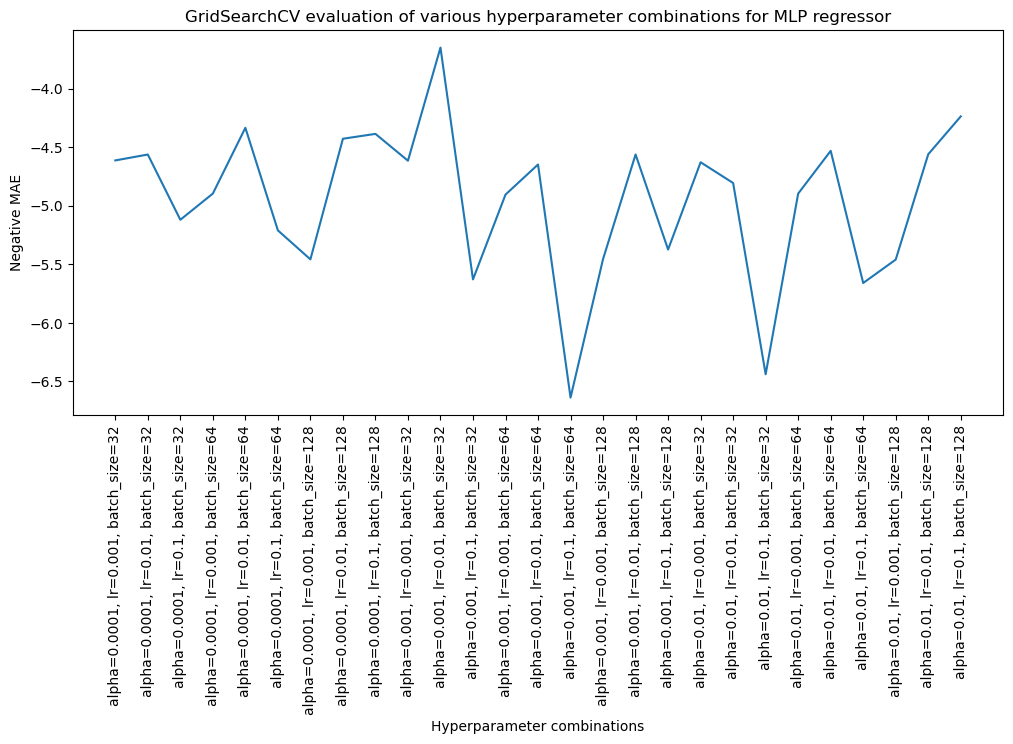

In [12]:
#Code separated for testing purposes

plt.figure(figsize=(12,5))

plt.title("GridSearchCV evaluation of various hyperparameter combinations for MLP regressor")

plt.xlabel("Hyperparameter combinations")
plt.ylabel("Negative MAE")

X_axis = np.arange(len(scores["params"]))

x_labels = [f"alpha={param['alpha']}, lr={param['learning_rate_init']}, batch_size={param['batch_size']}" for param in scores['params']]
y_values = scores['mean_test_score']

plt.plot(X_axis, y_values)
plt.xticks(X_axis, x_labels, rotation=90)
plt.show()